#
<div align="center">
    <h1>МИНОБРНАУКИ РОССИИ                  </h1>
    <h1>САНКТ-ПЕТЕРБУРГСКИЙ ГОСУДАРСТВЕННЫЙ </h1>
    <h1>ЭЛЕКТРОТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ      </h1>
    <h1>"ЛЭТИ" ИМ. В.И. УЛЬЯНОВА (ЛЕНИНА)   </h1>
    <h1>Кафедра МО ЭВМ                      </h1>
</div>

<br>
<br>
<br>
<br>

<div align="center">
    <h1>ОТЧЕТ                               </h1>
    <h2>по лабораторной работе №1           </h2>
    <h2>По дисциплине "Машинное Обучение"   </h2>
    <h2>Тема: Предобработка данных          </h2>
</div>

<br>
<br>
<br>
<br>

<style>
    td, th {
        border: none!important
    }
</style>
<div align="center" style="border: none!important">
    Студент гр. 8303:  ________________ Гришин К.И.
    <br>
    <br>
    Преподаватель:    ________________ Жангиров Т.Р.
</div>

<br>
<br>
<br>

<div align="center">
    <sub>
        Санкт-Петербург <br>
        2021
    </sub>
</div>

<br>
<br>
<br>

------------------------

# Helper functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def plot_data(data, bins, keys):
    _, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

    for i in range(6):
        x = i%3; y = i//3
        axs[y, x].hist(data[:, i], bins=bins, ec='black')
        axs[y, x].set_title(keys[i])

    plt.show()

def plot_data_frame(data_frame, bins):
    keys = data_frame.keys()
    plot_data(data_frame.to_numpy(), bins, keys)

def sort_data_frame(data_frame):
    return pd.concat([data_frame[col].sort_values().reset_index(drop=True) for col in data_frame], axis=1)

def plot_data_signal(data, keys):
    size = data.shape[1]
    print(size)
    _, axs = plt.subplots(nrows=size//3, ncols=3, figsize=(20, 12))
    for i in range(size):
        x = i%3; y = i//3
        axs[y, x].plot(np.arange(0, len(data[:, i]), 1), data[:, i])
        axs[y, x].set_title(keys[i] if i < size else i)
    plt.show()

def plot_data_frame_signal(data_frame):
    keys = data_frame.keys()
    data_frame_sorted = sort_data_frame(data_frame)
    plot_data_signal(data_frame_sorted.to_numpy(), keys)

def describe_data_frame(data_frame):
    return data_frame.describe().append(
        pd.DataFrame(data_frame.var(), columns=['variance']).T
    ).append(
        data_frame.mode().rename(index={0: 'mode'})
    ).drop(['count']).round(2)

# Загрузка данных

### Чтение данных

In [2]:

csv_path = 'heart_failure_clinical_records_dataset.csv'
data_frame = pd.read_csv(csv_path)

data_frame = data_frame.drop(columns= [
    'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'time', 'DEATH_EVENT'
])
sort_data_frame(data_frame)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,40.0,23,14,25100.0,0.5,113
1,40.0,30,15,47000.0,0.6,116
2,40.0,47,15,51000.0,0.6,121
3,40.0,47,17,62000.0,0.6,124
4,40.0,47,17,70000.0,0.6,125
...,...,...,...,...,...,...
294,90.0,4540,62,533000.0,5.8,145
295,90.0,5209,62,543000.0,6.1,145
296,94.0,5882,65,621000.0,6.8,145
297,95.0,7702,70,742000.0,9.0,146


### Визуальное представление

6


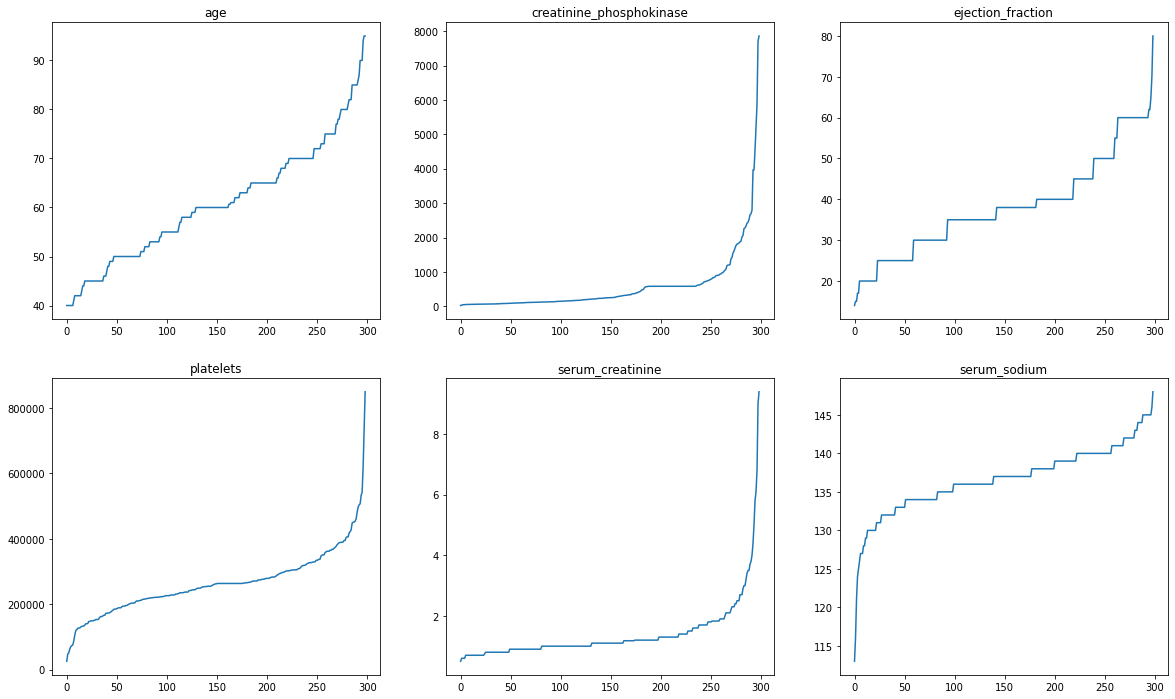

In [3]:
plot_data_frame_signal(data_frame)

In [4]:
describe_data_frame(data_frame)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,60.83,581.84,38.08,2.633580e+05,1.39,136.63
std,11.89,970.29,11.83,9.780424e+04,1.03,4.41
min,40.00,23.00,14.00,2.510000e+04,0.50,113.00
25%,51.00,116.50,30.00,2.125000e+05,0.90,134.00
50%,60.00,250.00,38.00,2.620000e+05,1.10,137.00
75%,70.00,582.00,45.00,3.035000e+05,1.40,140.00
max,95.00,7861.00,80.00,8.500000e+05,9.40,148.00
variance,141.49,941458.57,140.06,9.565669e+09,1.07,19.47
mode,60.00,582.00,35.00,2.633580e+05,1.00,136.00


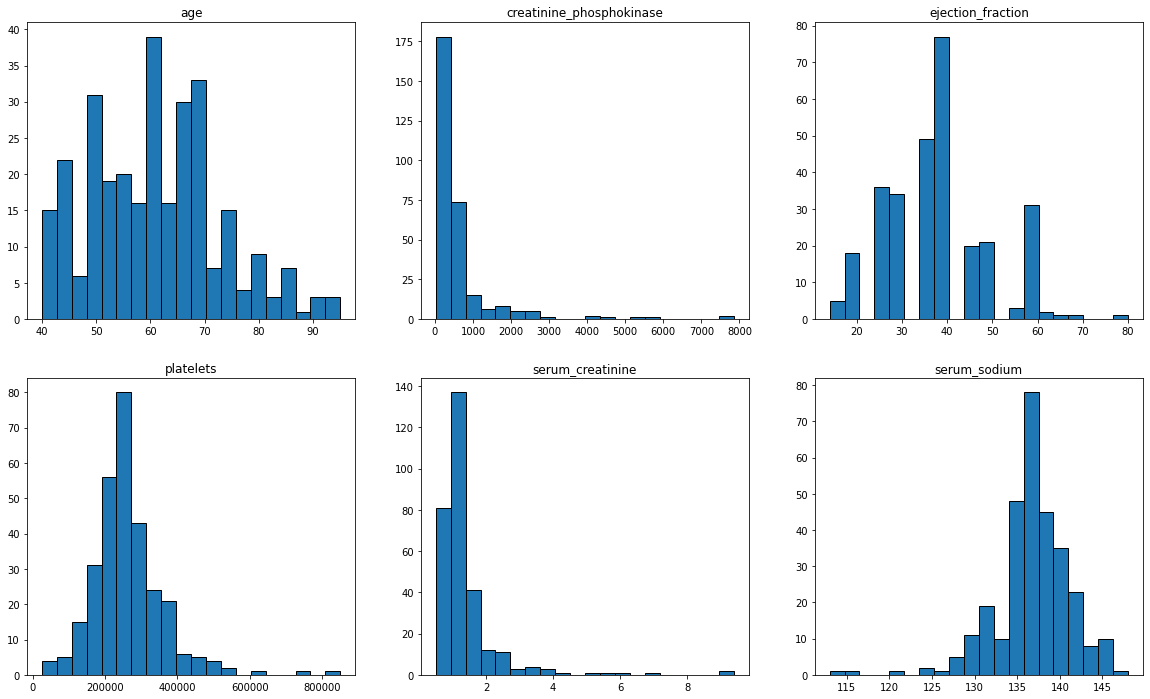

In [5]:
plot_data_frame(data_frame, 20)

In [6]:
describe_data_frame(data_frame)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,60.83,581.84,38.08,2.633580e+05,1.39,136.63
std,11.89,970.29,11.83,9.780424e+04,1.03,4.41
min,40.00,23.00,14.00,2.510000e+04,0.50,113.00
25%,51.00,116.50,30.00,2.125000e+05,0.90,134.00
50%,60.00,250.00,38.00,2.620000e+05,1.10,137.00
75%,70.00,582.00,45.00,3.035000e+05,1.40,140.00
max,95.00,7861.00,80.00,8.500000e+05,9.40,148.00
variance,141.49,941458.57,140.06,9.565669e+09,1.07,19.47
mode,60.00,582.00,35.00,2.633580e+05,1.00,136.00


# Стандартизация данных

### Настройка масштабирования по первым 150 записям

In [7]:
data = data_frame.to_numpy(dtype='float')
scaler_partial = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled_partial = scaler_partial.transform(data)
data_frame_scaled_partial = pd.DataFrame(data=data_scaled_partial, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])

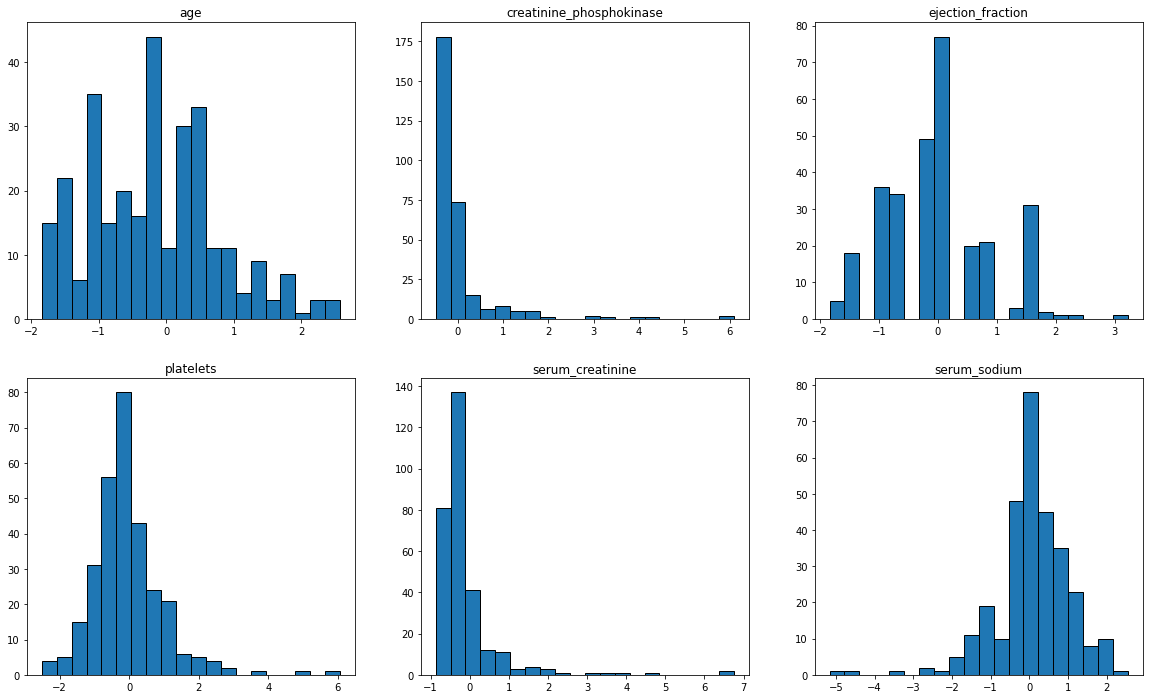

In [8]:
plot_data_frame(data_frame_scaled_partial, 20)

In [9]:
describe_data_frame(data_frame_scaled_partial)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,-0.17,-0.02,0.01,-0.04,-0.11,0.04
std,0.96,0.82,0.91,1.02,0.89,0.97
min,-1.84,-0.49,-1.84,-2.51,-0.87,-5.17
25%,-0.96,-0.41,-0.61,-0.56,-0.53,-0.54
50%,-0.24,-0.30,0.00,-0.05,-0.36,0.12
75%,0.57,-0.02,0.54,0.38,-0.10,0.78
max,2.57,6.10,3.23,6.06,6.76,2.54
variance,0.91,0.67,0.82,1.03,0.79,0.94
mode,-0.24,-0.02,-0.23,-0.04,-0.45,-0.10


### Настройка масштабирования по всем записям

In [10]:
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

data_frame_scaled = pd.DataFrame(data=data_scaled, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])

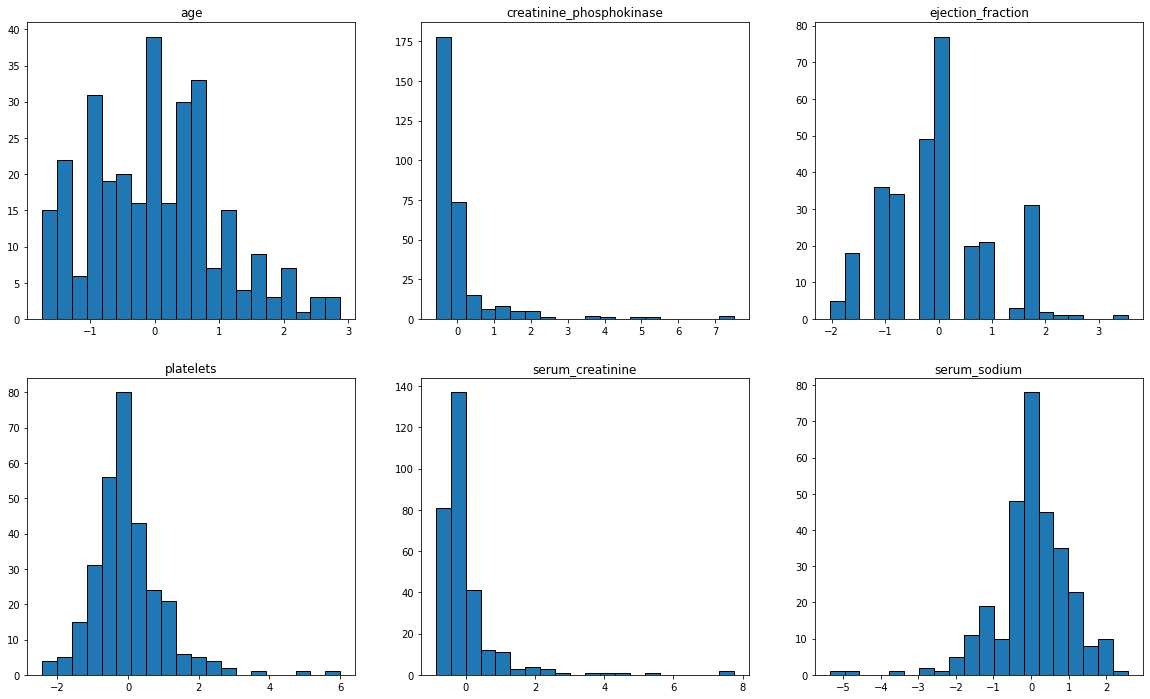

In [11]:
plot_data_frame(data_frame_scaled, 20)

In [12]:
describe_data_frame(data_frame_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.75,-0.58,-2.04,-2.44,-0.87,-5.36
25%,-0.83,-0.48,-0.68,-0.52,-0.48,-0.60
50%,-0.07,-0.34,-0.01,-0.01,-0.28,0.09
75%,0.77,0.00,0.59,0.41,0.01,0.77
max,2.88,7.51,3.55,6.01,7.75,2.58
variance,1.00,1.00,1.00,1.00,1.00,1.00
mode,-0.07,0.00,-0.26,0.00,-0.38,-0.14


### Сводная таблица

In [13]:
pd.concat([
    data_frame.mean(),
    data_frame.std(),
    data_frame_scaled_partial.mean(),
    data_frame_scaled_partial.std(),
    data_frame_scaled.mean(),
    data_frame_scaled.std(),
], axis=1, keys=[
    "mean",
    "std",
    "scaled partial mean",
    "scaled partial std",
    "scaled mean",
    "scaled std",
    ]
).T.round(3)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,60.834,581.839,38.084,263358.029,1.394,136.625
std,11.895,970.288,11.835,97804.237,1.035,4.412
scaled partial mean,-0.170,-0.021,0.011,-0.035,-0.109,0.038
scaled partial std,0.955,0.816,0.908,1.017,0.887,0.972
scaled mean,0.000,0.000,-0.000,0.000,0.000,-0.000
scaled std,1.002,1.002,1.002,1.002,1.002,1.002


### Значения скейлеров

In [14]:
pd.DataFrame({
    "scaler partial mean": scaler_partial.mean_,
    "scaler partial var": scaler_partial.var_,
    "scaler partial std": np.sqrt(scaler_partial.var_)
}, index=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']).T.round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
scaler partial mean,62.95,607.15,37.95,2.667468e+05,1.52,136.45
scaler partial var,155.00,1415488.82,170.02,9.252860e+09,1.36,20.61
scaler partial std,12.45,1189.74,13.04,9.619179e+04,1.17,4.54


In [15]:
pd.DataFrame({
    "scaler mean": scaler.mean_,
    "scaler var": scaler.var_,
    "scaler std": np.sqrt(scaler.var_),
}, index=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']).T.round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
scaler mean,60.83,581.84,38.08,2.633580e+05,1.39,136.63
scaler var,141.01,938309.88,139.60,9.533677e+09,1.07,19.40
scaler std,11.87,968.66,11.82,9.764055e+04,1.03,4.41


# Приведение к диапазону

### Ограничение диапазона от 0 до 1

In [16]:
min_max_scaler_default = preprocessing.MinMaxScaler().fit(data)

data_frame_min_max_scaled = pd.DataFrame(
    min_max_scaler_default.transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

pd.DataFrame({
    "scaler min": min_max_scaler_default.data_min_,
    "scaler max": min_max_scaler_default.data_max_
}, index=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']).T.round(2)


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
scaler min,40.0,23.0,14.0,25100.0,0.5,113.0
scaler max,95.0,7861.0,80.0,850000.0,9.4,148.0


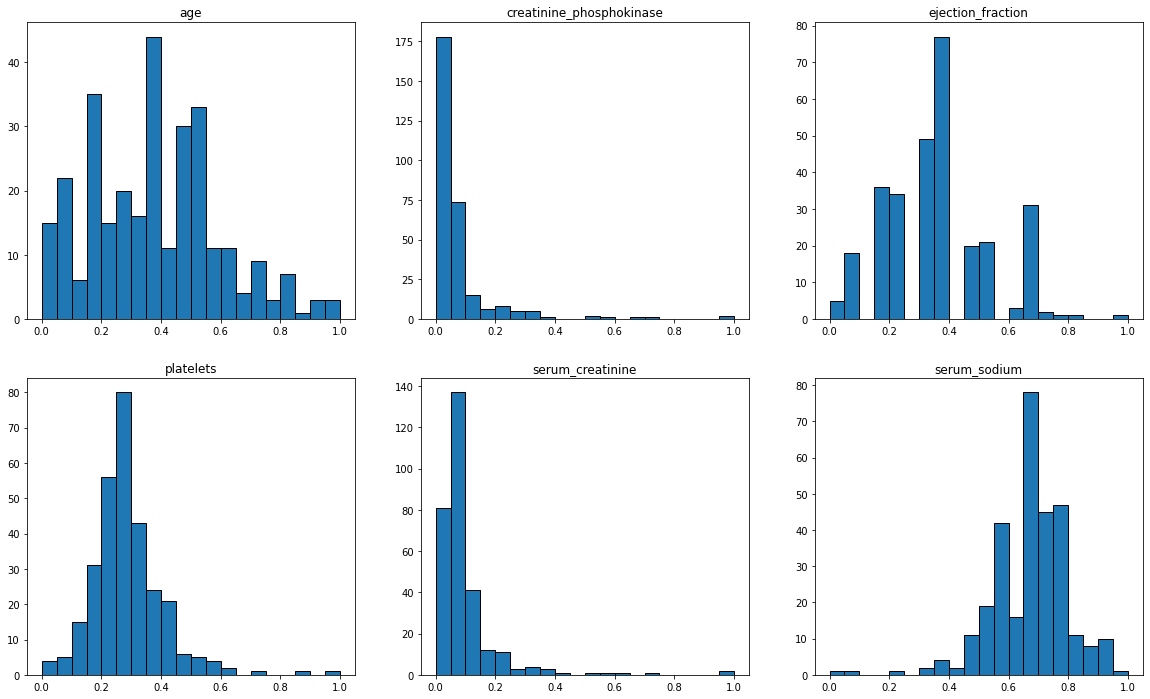

In [17]:
plot_data_frame(data_frame_min_max_scaled, 20)

In [18]:
describe_data_frame(data_frame_min_max_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.38,0.07,0.36,0.29,0.10,0.68
std,0.22,0.12,0.18,0.12,0.12,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.01,0.24,0.23,0.04,0.60
50%,0.36,0.03,0.36,0.29,0.07,0.69
75%,0.55,0.07,0.47,0.34,0.10,0.77
max,1.00,1.00,1.00,1.00,1.00,1.00
variance,0.05,0.02,0.03,0.01,0.01,0.02
mode,0.36,0.07,0.32,0.29,0.06,0.66


### (MaxAbsScaler)

In [19]:
data_frame_max_abs_scaled = pd.DataFrame(
    preprocessing.MaxAbsScaler().fit_transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

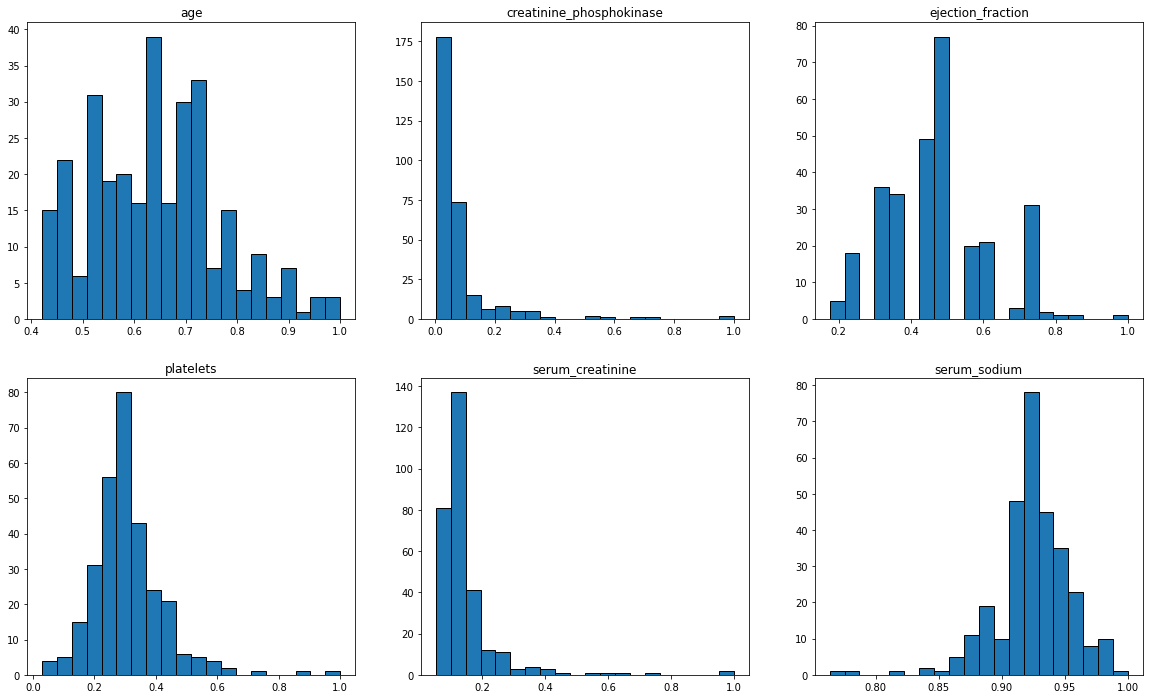

In [20]:
plot_data_frame(data_frame_max_abs_scaled, 20)

### (RobustScaler)

In [21]:
data_frame_robust_scaled = pd.DataFrame(
    preprocessing.RobustScaler().fit_transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

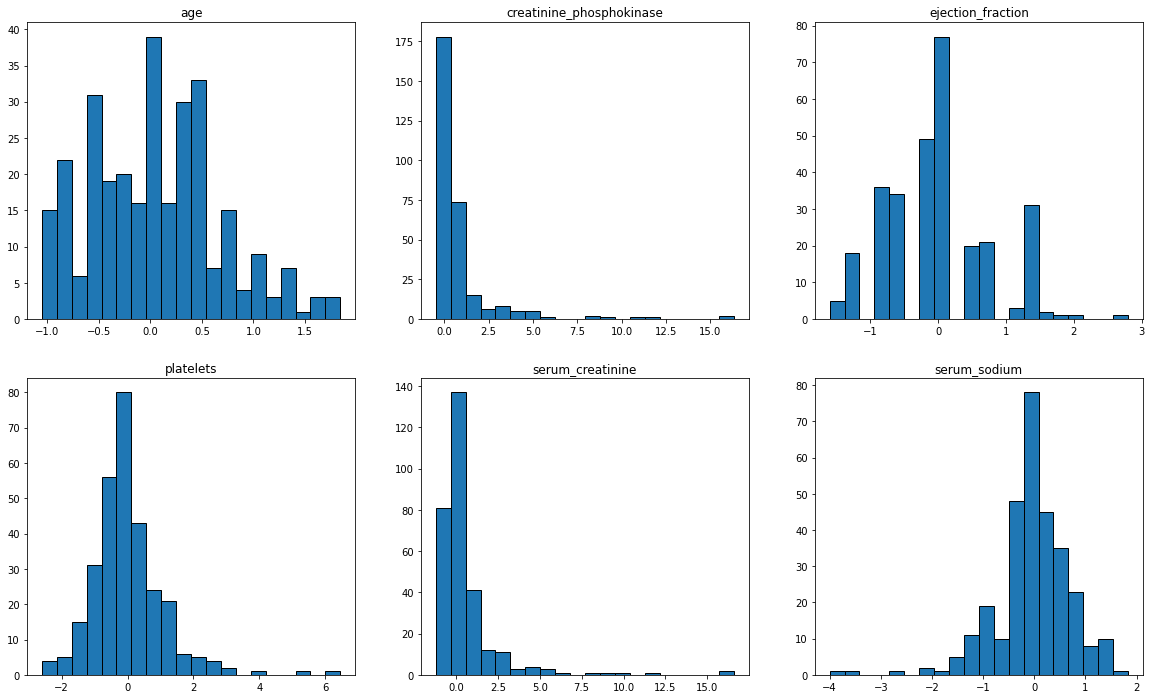

In [22]:
plot_data_frame(data_frame_robust_scaled, 20)

In [23]:
describe_data_frame(data_frame_robust_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.04,0.71,0.01,0.01,0.59,-0.06
std,0.63,2.08,0.79,1.07,2.07,0.74
min,-1.05,-0.49,-1.60,-2.60,-1.20,-4.00
25%,-0.47,-0.29,-0.53,-0.54,-0.40,-0.50
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.53,0.71,0.47,0.46,0.60,0.50
max,1.84,16.35,2.80,6.46,16.60,1.83
variance,0.39,4.34,0.62,1.16,4.28,0.54
mode,0.00,0.71,-0.20,0.01,-0.20,-0.17


### Установка диапазона значений от -5 до 10

In [24]:
def min_max_scaler(data, min, max):
    d_min, d_max = min, max
    
    def map_range(value, s_min, s_max, d_min, d_max):
        return (value - s_min) / (s_max - s_min) * (d_max - d_min) + d_min

    def inner_min_max(values):
        s_min, s_max = np.min(values), np.max(values)
        l = lambda x: map_range(x, s_min, s_max, d_min, d_max)
        return np.array(list(map(l, values)))

    return np.array(list(map(inner_min_max, data.T))).T

data_frame_n5_p10_scaled = pd.DataFrame(
    # preprocessing.MinMaxScaler((-5, 10)).fit_transform(data),
    min_max_scaler(data, -5, 10),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

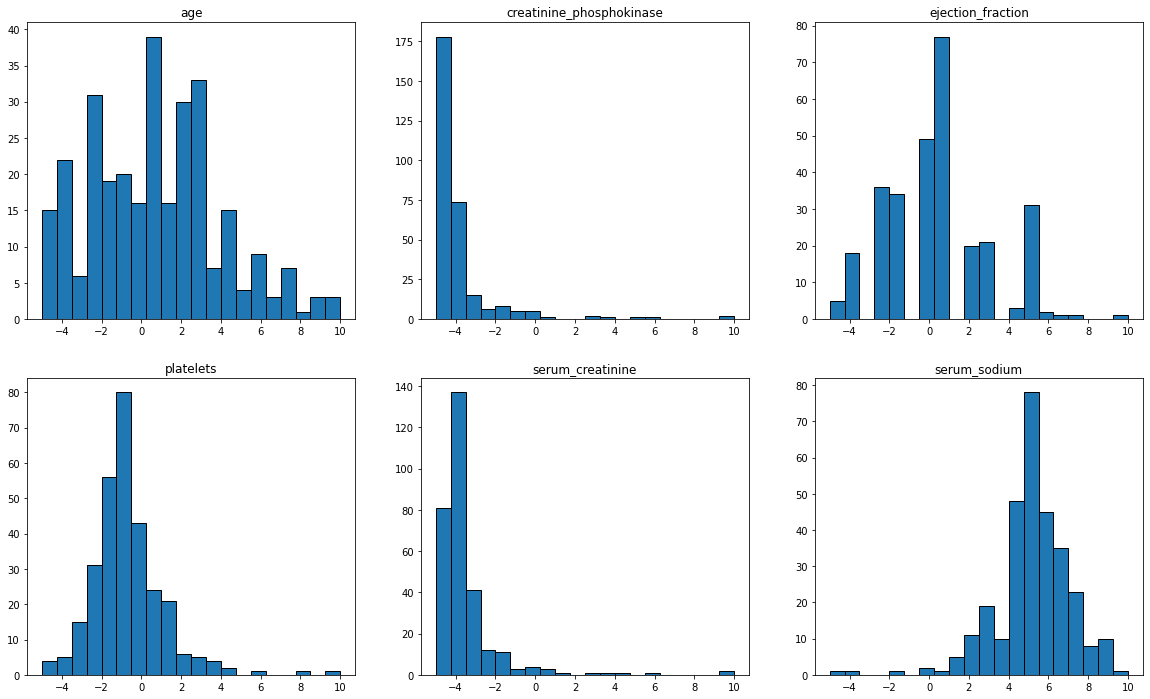

In [25]:
plot_data_frame(data_frame_n5_p10_scaled,20)

In [26]:
describe_data_frame(data_frame_n5_p10_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.68,-3.93,0.47,-0.67,-3.49,5.13
std,3.24,1.86,2.69,1.78,1.74,1.89
min,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00
25%,-2.00,-4.82,-1.36,-1.59,-4.33,4.00
50%,0.45,-4.57,0.45,-0.69,-3.99,5.29
75%,3.18,-3.93,2.05,0.06,-3.48,6.57
max,10.00,10.00,10.00,10.00,10.00,10.00
variance,10.52,3.45,7.23,3.16,3.04,3.58
mode,0.45,-3.93,-0.23,-0.67,-4.16,4.86


# Нелинейные преобразования

### Равномерное квантильное преобразование

In [27]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0).fit(data)
data_frame_quantile_scaled = pd.DataFrame(
    quantile_transformer.transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

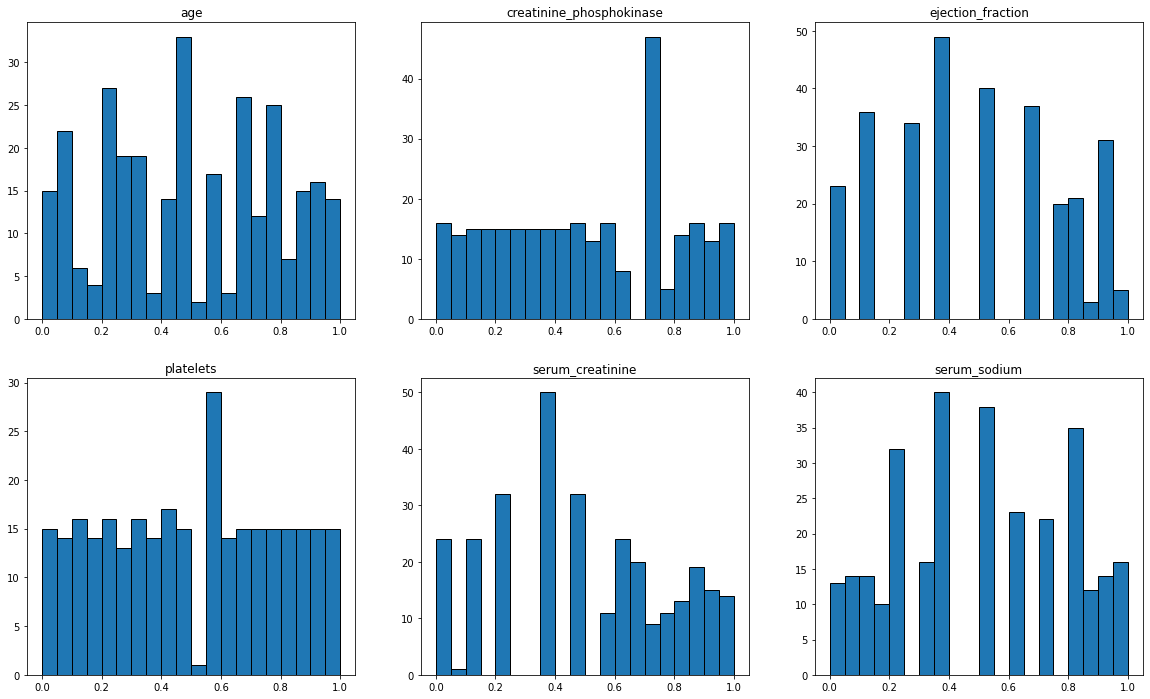

In [28]:
plot_data_frame(data_frame_quantile_scaled, 20)

In [29]:
describe_data_frame(data_frame_quantile_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.50,0.50,0.50,0.50,0.50,0.50
std,0.29,0.29,0.29,0.29,0.29,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.25,0.25,0.25,0.22,0.22
50%,0.48,0.50,0.55,0.50,0.49,0.53
75%,0.78,0.71,0.77,0.75,0.75,0.80
max,1.00,1.00,1.00,1.00,1.00,1.00
variance,0.08,0.08,0.08,0.08,0.08,0.08
mode,0.48,0.71,0.39,0.55,0.35,0.39


### Нормальное квантильное преобразование

In [30]:
data_frame_quantile_normal_scaled = pd.DataFrame(
    preprocessing.QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal').fit_transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

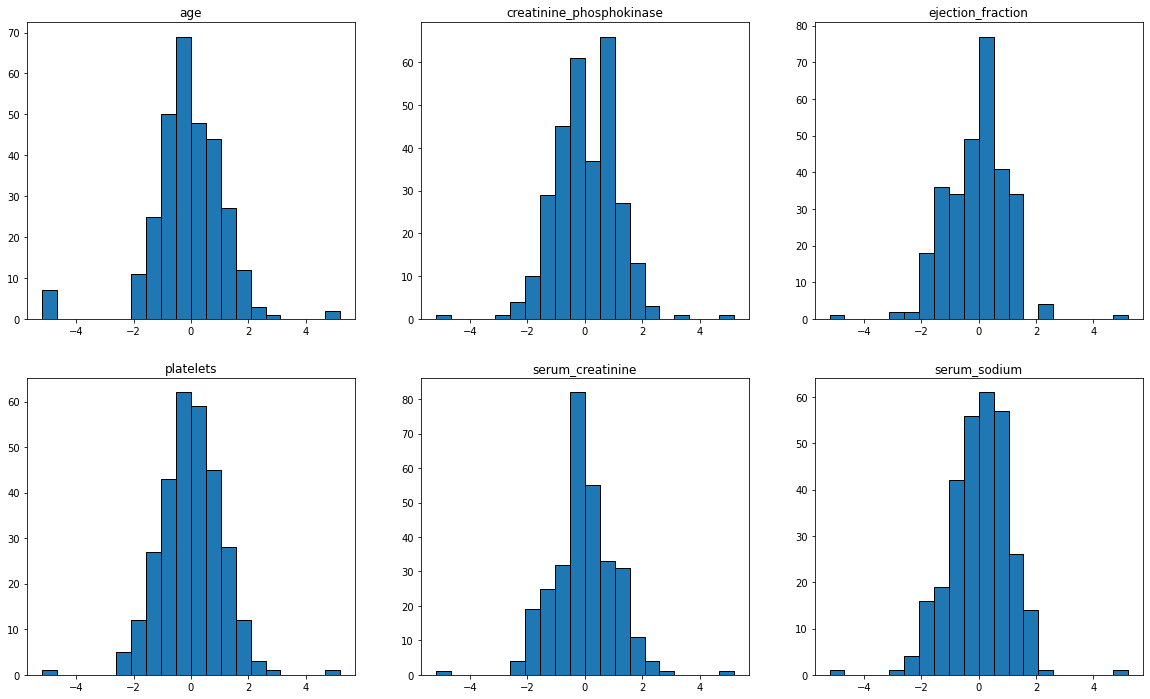

In [31]:
plot_data_frame(data_frame_quantile_normal_scaled, 20)

In [32]:
describe_data_frame(data_frame_quantile_normal_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,-0.05,-0.00,-0.00,0.00,0.00,-0.00
std,1.29,1.07,1.05,1.07,1.06,1.07
min,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
25%,-0.67,-0.68,-0.67,-0.68,-0.78,-0.76
50%,-0.04,-0.00,0.11,-0.00,-0.03,0.08
75%,0.78,0.54,0.73,0.68,0.67,0.85
max,5.20,5.20,5.20,5.20,5.20,5.20
variance,1.66,1.15,1.11,1.14,1.13,1.13
mode,-0.04,0.54,-0.28,0.13,-0.38,-0.27


### Нормальное преобразование (PowerScaler)

In [33]:
data_frame_power_scaled = pd.DataFrame(
    preprocessing.PowerTransformer().fit_transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

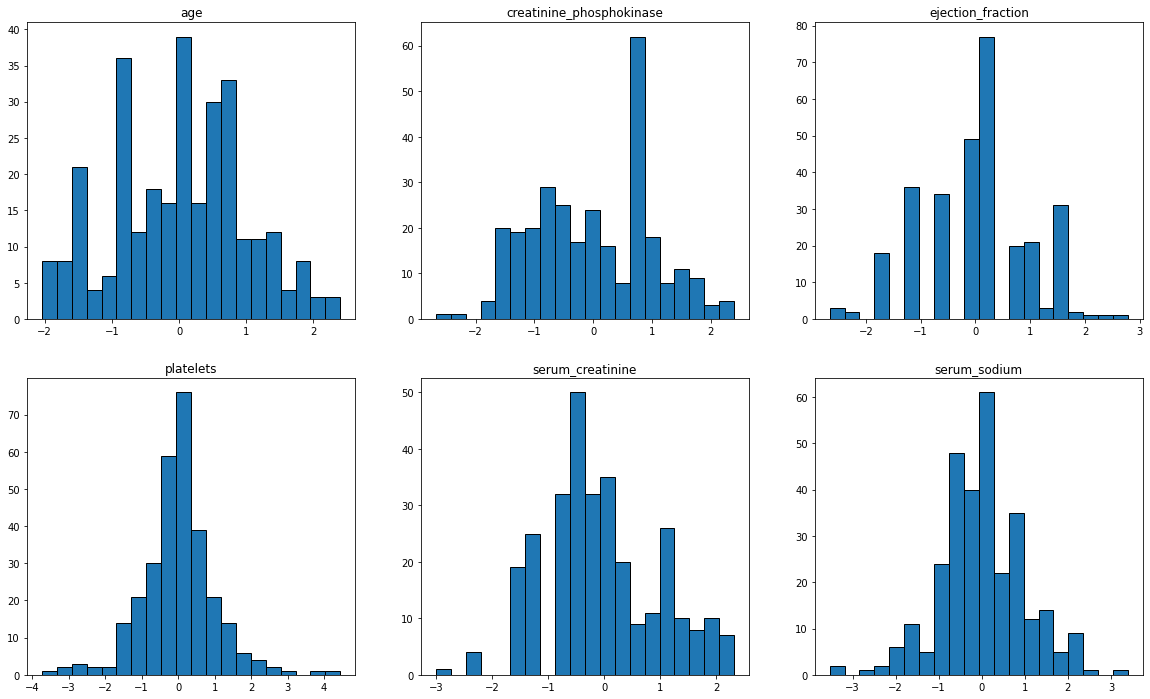

In [34]:
plot_data_frame(data_frame_power_scaled, 20)

In [35]:
describe_data_frame(data_frame_power_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.04,-2.68,-2.66,-3.73,-3.01,-3.54
25%,-0.81,-0.78,-0.63,-0.47,-0.73,-0.69
50%,0.02,-0.04,0.10,0.08,-0.09,-0.01
75%,0.82,0.69,0.66,0.50,0.57,0.77
max,2.40,2.40,2.79,4.44,2.32,3.40
variance,1.00,1.00,1.00,1.00,1.00,1.00
mode,0.02,0.69,-0.16,0.09,-0.38,-0.24


# Дискретизация признаков

In [36]:
bin_discretizer = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal').fit(data)
data_frame_discrete_scaled = pd.DataFrame(
    bin_discretizer.transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)

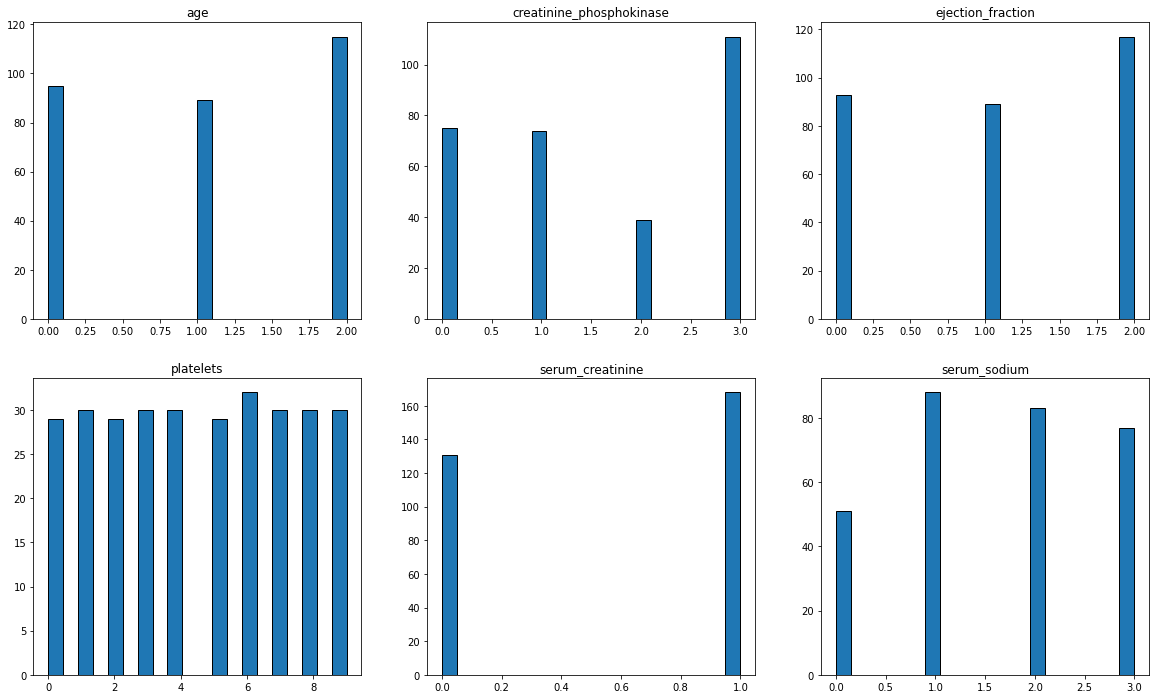

In [37]:
plot_data_frame(data_frame_discrete_scaled, 20)

In [38]:
describe_data_frame(data_frame_discrete_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,1.07,1.62,1.08,4.53,0.56,1.62
std,0.84,1.22,0.84,2.87,0.50,1.05
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.50,0.00,2.00,0.00,1.00
50%,1.00,2.00,1.00,5.00,1.00,2.00
75%,2.00,3.00,2.00,7.00,1.00,3.00
max,2.00,3.00,2.00,9.00,1.00,3.00
variance,0.70,1.48,0.70,8.23,0.25,1.09
mode,2.00,3.00,2.00,6.00,1.00,1.00


In [39]:
pd.DataFrame(
    data=list(map(lambda arr: pd.Series(arr), bin_discretizer.bin_edges_)),
    index=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
).T.round(2).replace(np.nan, '')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,40.0,23.0,14.0,25100.0,0.5,113.0
1,55.0,116.5,35.0,153000.0,1.1,134.0
2,65.0,250.0,40.0,196000.0,9.4,137.0
3,95.0,582.0,80.0,221000.0,,140.0
4,,7861.0,,237000.0,,148.0
5,,,,262000.0,,
6,,,,265000.0,,
7,,,,285200.0,,
8,,,,319800.0,,
9,,,,374600.0,,
